Ashok kumar saini

Dec 31,2022

# Customer Churn Analysis

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np

# Getting the Data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

# Data Exploration/Analysis

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The training-set has 7043 examples and 20 features + the target variable (TotalCharges). 1 of the feature is float, 2 are integers and 18 are objects. 

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Above we can see that 64% out of the training-set MonthlyCharges . We can also see that the tenure range from 32 to 72.

In [10]:
df.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features.

# Let’s take a more detailed look at what data is actually missing:

In [11]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


The TotalCharges target variable has only 11 missing values, which can easily be filled. 

In [12]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [13]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [14]:
df.TotalCharges.dtype

dtype('float64')

Now we can see total charges columns has some space values which is replaced by nan values.Now we will handle the nan values.Handling the Nan values and replacing it with the mean of the column.As the column is continuous in nature.

In [15]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [16]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [17]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [18]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [19]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making DataFrame for the Nominal Data

In [22]:
df_visualization_nominal = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

In [23]:
df_visualization_nominal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualization of the Data

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns

In [24]:
import seaborn as sns

# Male and Female

Male      3555
Female    3488
Name: gender, dtype: int64


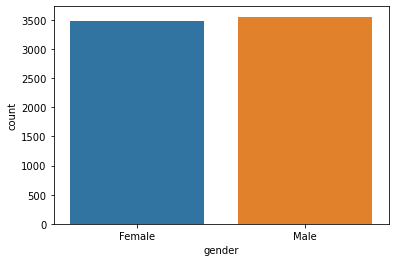

In [25]:
ax=sns.countplot(x='gender',data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

Here we see clearly, that the total number of male customer is 3555 and total number of female customer is 3488.

# Younger and Seniorcitize

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


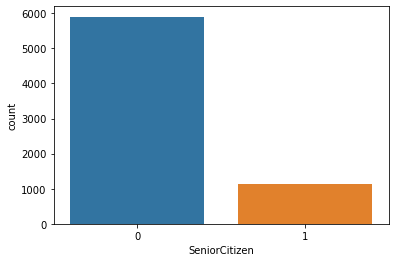

In [26]:
ax=sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

Here we see clearly, that the total number of younger is 5901 and total number of seniorcitizen customer is 1142.

# Married and Unmarried

No     3641
Yes    3402
Name: Partner, dtype: int64


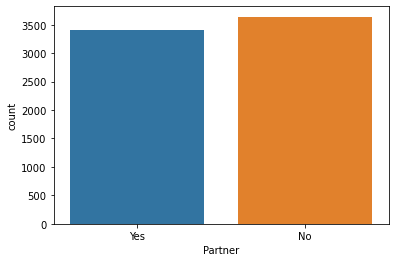

In [27]:
ax=sns.countplot(x='Partner',data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

Here we see clearly, that the total number of married customer is 3402 and total number of female customer is 3641.

# Dependent and Independent

No     4933
Yes    2110
Name: Dependents, dtype: int64


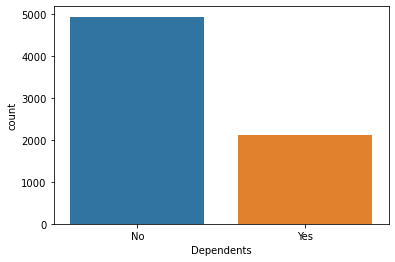

In [28]:
ax=sns.countplot(x='Dependents',data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

Here we see clearly, that the total number of dependent customer is 2110 and total number of independent customer is 4933.

# Phone service and not using phone service

Yes    6361
No      682
Name: PhoneService, dtype: int64


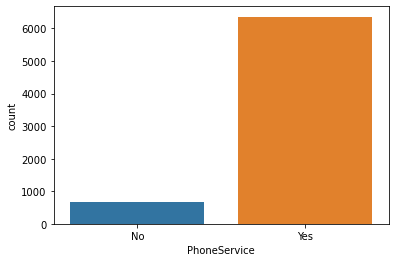

In [29]:
ax=sns.countplot(x='PhoneService',data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

Here we see clearly, that the total number of phone service customer is 6361 and total number of not using phone service customer is 682.

# No phone services custome and multipleline customer and Not multipleline customer

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


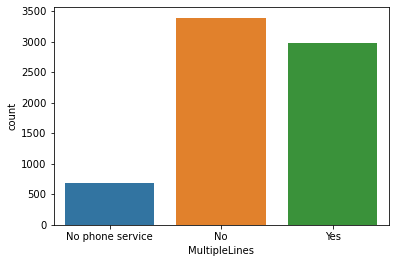

In [30]:
ax=sns.countplot(x='MultipleLines',data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

Here we see clearly, that the total number of no phone services customer is 682 and total number of multipleline customer is 2971 and multiplelines is 3390

# Fiber optic and DSL and No internetservices customer

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


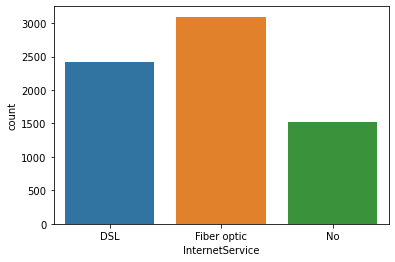

In [31]:
ax=sns.countplot(x='InternetService',data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

Here we see clearly, that the total number of fiber optics customer is 3096 and total number of DSL customer is 2421 and no internetservices customer is 1526.

# Onlinesecurity customer and  Not online security customer and No internetsecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


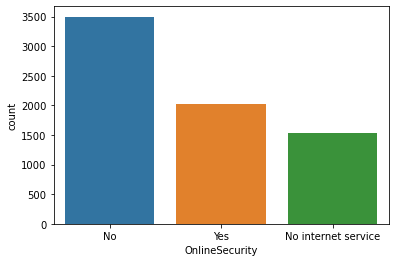

In [32]:
ax=sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

Here we see clearly, that  the total number of onlinesecurity customer is 2019 and total number of not online security customer is 3498 and no internetsecurity is 1526.

# Onlinebackup customer and Not onlinebackup and No internet services

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


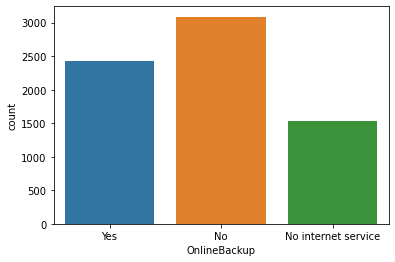

In [33]:
ax=sns.countplot(x='OnlineBackup',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

Here we see clearly, that the total number of onlinebackup customer is 2429 and total number of not onlinebackup customer is 3088 and no internet services is 1526

# Deviceprotection customer and Not Deviceprotection and No internet services

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


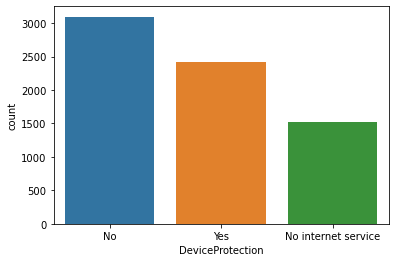

In [34]:
ax=sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

Here we see clearly, that the total number of Deviceprotection customer is 2242 and total number of not Deviceprotection customer is 3095 and no internet services is 1526.

# Techsupport customer and Not Techsupport customer and No internet services

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


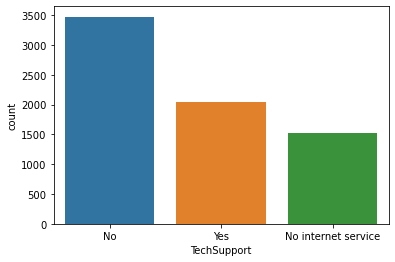

In [35]:
ax=sns.countplot(x='TechSupport',data=df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

Here we see clearly, that the total number of Techsupport customer is 2044 and total number of not Techsupport customer is 3473 and no internet services is 1526.

# Streamingmovies customer and Not streamingmovies customer and No internet services

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


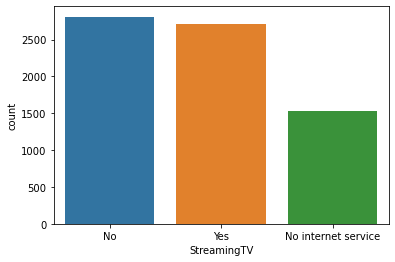

In [36]:
ax=sns.countplot(x='StreamingTV',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

Here we see clearly, that the total number of streaming tv customer is 2707 and total number of not streamingtv customer is 2810 and no internet services is 1526

# Streamingmovies customer and Not streamingmovies customer and No internet services

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


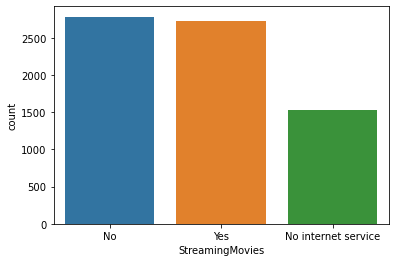

In [37]:
ax=sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

Here we see clearly, that the total number of streamingmovies customer is 2732 and total number of not streamingmovies customer is 2785 and no internet services is 1526

# Month-to-month and Two year and Two year

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


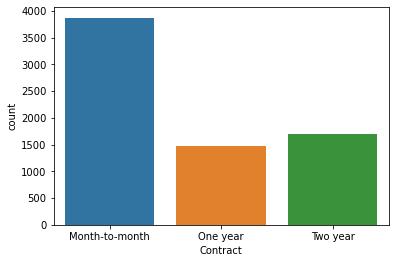

In [38]:
ax=sns.countplot(x='Contract',data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

Here we see clearly, that the total number of contract month to month customer is 3875 and total number of contract two year customer is 1695 and one year is 1473.

# Paperlessbilling customer and Not paperlessbilling customer

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


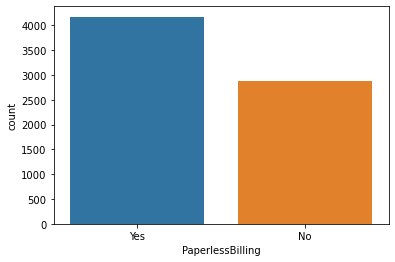

In [39]:
ax=sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

 Here we see clearly, that the total number of paperlessbilling customer is 4171 and total number of not paperlessbilling customer is 2872.

# Electronic check and Mailed check and Bank transfer (automatic) and Credit card (automatic)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


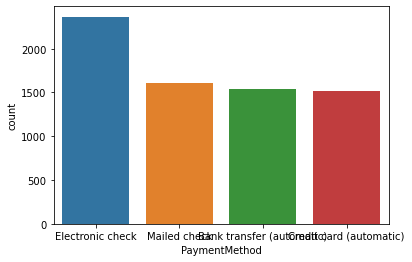

In [40]:
ax=sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

 Here we see clearly, that the total number of Electronic check customer is 2365 and total number of Mailed check customer is 1612 and Bank transfer (automatic) is 1544 and Credit card (automatic) is 1522.

# churn customer and not Churn customer

No     5174
Yes    1869
Name: Churn, dtype: int64


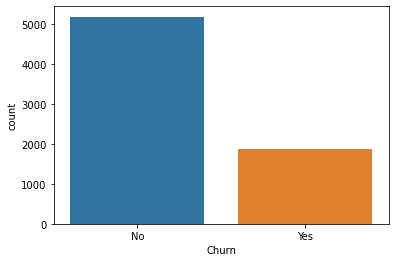

In [41]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

Here we see clearly, that the total number of churn customer is 1869 and total number of not churn customer is 5174 .

# Making DataFrame of the ordinal data

Ordinal data :-
    Ordinal data is a type of qualitative (non-numeric) data that groups variables into descriptive categories. A distinguishing feature of ordinal data is that the categories it uses are ordered on some kind of hierarchical scale, e.g. high to low. On the levels of measurement, ordinal data comes second in complexity, directly after nominal data.

In [42]:
df_visualization_ordinal=df[["customerID","tenure"]].copy()

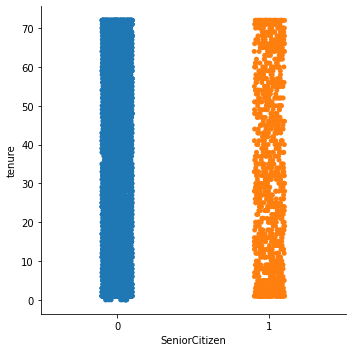

In [43]:
sns.catplot(x="SeniorCitizen",y="tenure",data=df)

# Checking the distribution of the continuous values of the float type columns

In [44]:
df_visualization_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

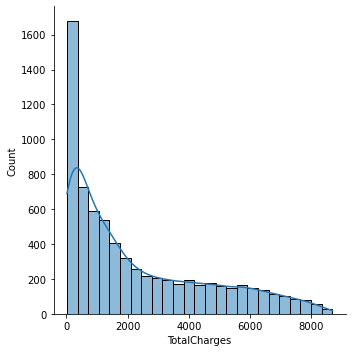

In [45]:
import seaborn as sns
sns.displot(df_visualization_continuous["TotalCharges"],kde=True)

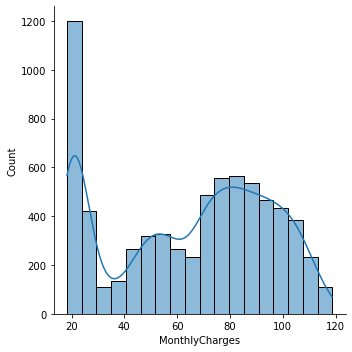

In [46]:
sns.displot(df_visualization_continuous["MonthlyCharges"],kde=True)

Visualization part complete

1
Since the dataset has a lot of string values.We will use the encoding techniques to convert the string data to numerical one

# Encoding of DataFrame:

As we all know that better encoding leads to a better model and most algorithms cannot handle the categorical variables unless they are converted into a numerical value.

In [47]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [48]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [49]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


<AxesSubplot:>

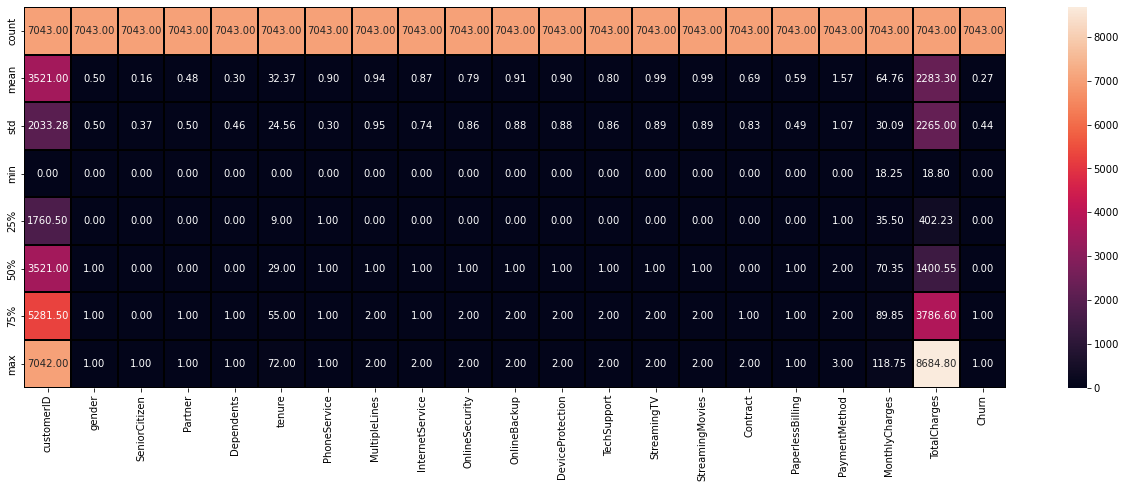

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

Correlation analysis is applied in quantifying the association between two continuous variables, for example, an dependent and independent variable or among two independent variables.

In [51]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

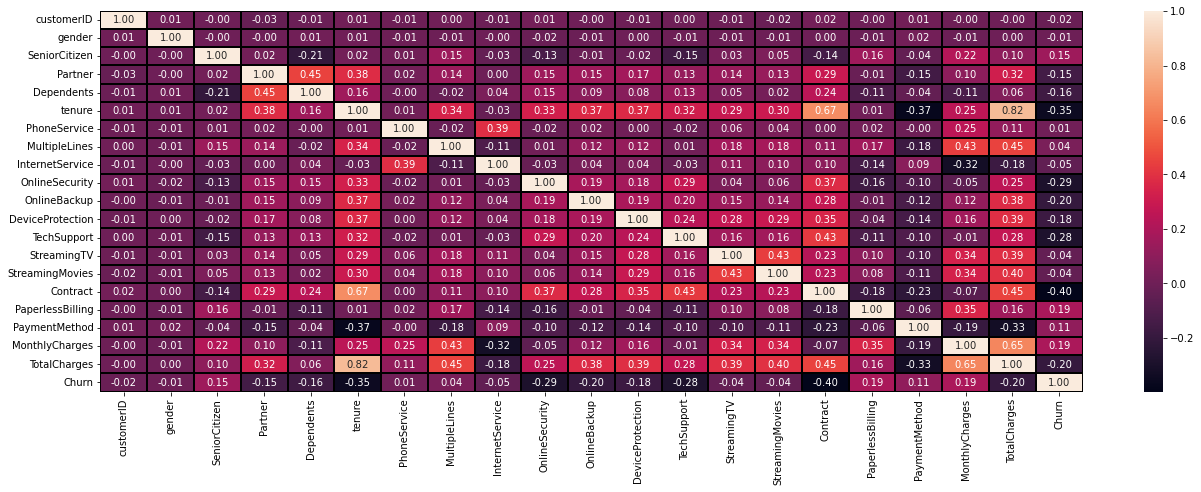

In [52]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negative correlated with the target columns.

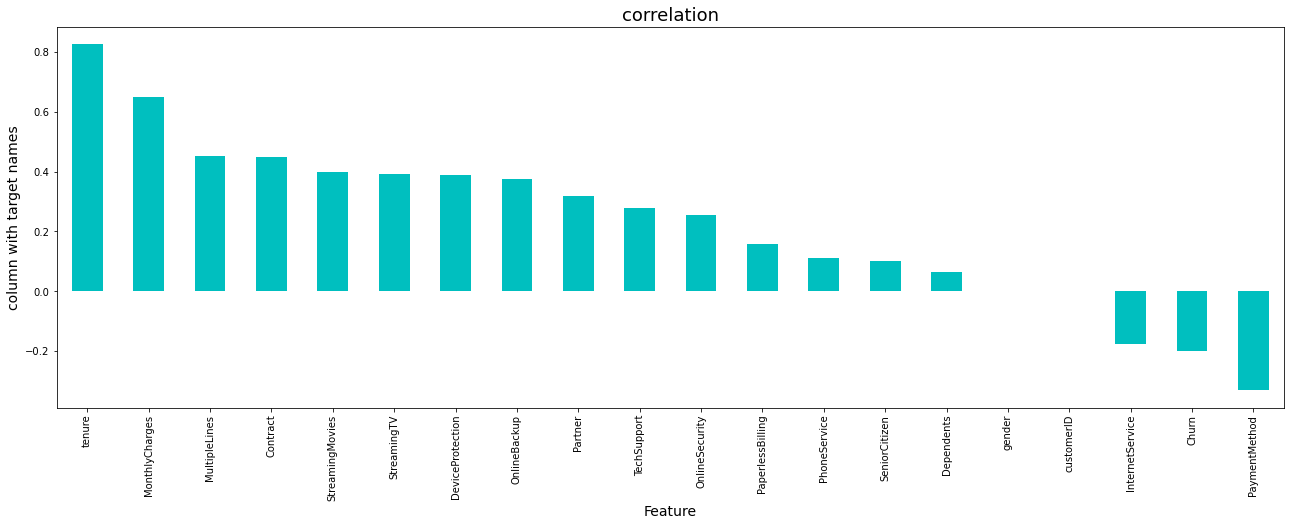

In [53]:
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [54]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

keeping +/-0.5 as the range for skewness,here are the columns which does not lie with in this range. Senior Citizen- Categorical. Dependents-Categorical. Phone service-Categorical. Contract-Categorical. Total Charges-target variable. Churn-Categorical.

Since no column has skewness,we will not treat that.

# Outliers Check:

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

In [55]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Checking the outliers on the int and float type of columns.

<AxesSubplot:>

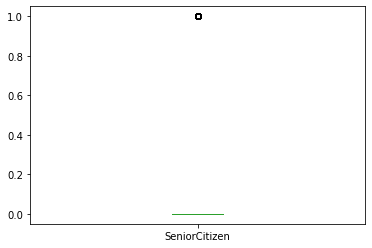

In [56]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

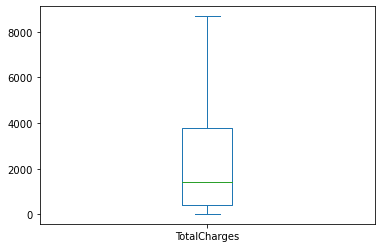

In [57]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

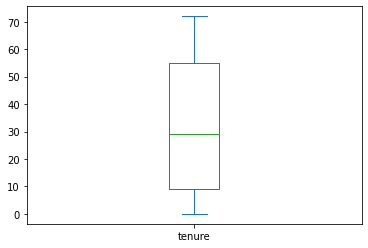

In [58]:
df['tenure'].plot.box()

In [59]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Since the column senior Citizen is nominal type.we cannot consider its data point as outlier.

# Considering the outlier remove.

In [60]:
df.shape

(7043, 21)

In [61]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [62]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [63]:
df_new_z.shape

(6361, 21)

# percentage loss of data:

In [64]:
Data_loss = ((7043-6361)/7043)*100
Data_loss 

9.683373562402386

our data becoming biased as it is not considering the case of senior citizens.thus, we will not remove outliers.

# Separating the columns into features and targets:

In [65]:
features=df.drop('TotalCharges',axis=1)
target=df['TotalCharges']

# Scaling the data using min-max Scaler:

Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function.
Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.
Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
for i in range (0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9058706722803965
At random state 0,the testing accuracy is:- 0.8977317673785854


At random state 1,the training accuracy is:- 0.9052277082152647
At random state 1,the testing accuracy is:- 0.9003132716690803


At random state 2,the training accuracy is:- 0.9056858398935237
At random state 2,the testing accuracy is:- 0.8984735750686543


At random state 3,the training accuracy is:- 0.9044956724241888
At random state 3,the testing accuracy is:- 0.9032713403489678


At random state 4,the training accuracy is:- 0.9031354749784841
At random state 4,the testing accuracy is:- 0.9085937883962479


At random state 5,the training accuracy is:- 0.9026338340566921
At random state 5,the testing accuracy is:- 0.9101290251842342


At random state 6,the training accuracy is:- 0.9028087364691222
At random state 6,the testing accuracy is:- 0.9097783155230829


At random state 7,the training accuracy is:- 0.9030731852162728
At random state 7,the testing acc

In [69]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [70]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [71]:
pred_test=lr.predict(features_test)

In [72]:
print(r2_score(target_test,pred_test))

0.9042173834952025


# Cross-validation of the model 

Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.

In [73]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9033382537767014 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 3 the cv score is 0.9037012261875313 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 4 the cv score is 0.9037044584134895 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 5 the cv score is 0.9036665825623267 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 6 the cv score is 0.903734902438936 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 7 the cv score is 0.9035677539347998 and accuracy score for training is -0.891121898019114 and accuracy for the testing is 0.9042173834952025


At cross fold 8 the cv score is 0.9035565941557734 an

Since the number of fold do not have such impact on the accuracy and cv_score. so cv=5 is selected.

Here we have handled the problem of overfitting and checking the training and testing score.

Linear Regression :-
                    Linear regression is used to predict the relationship between two variables by applying a linear equation to observed data. There are two types of variable, one variable is called an independent variable, and the other is a dependent variable. Linear regression is commonly used for predictive analysis.

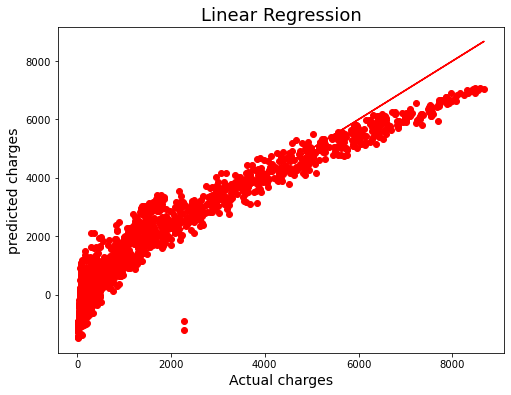

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color="r")
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the data points which shows good fit of our model.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [76]:
from sklearn.linear_model import Lasso


parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
              'random_state': list(range(0,10))}

ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


# final model training

A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output. The result from this correlation is used to modify the model.

This iterative process is called “model fitting”. The accuracy of the training dataset or the validation dataset is critical for the precision of the model.

Model training in machine language is the process of feeding an ML algorithm with data to help identify and learn good values for all attributes involved. There are several types of machine learning models, of which the most common ones are supervised and unsupervised learning.

Supervised learning is possible when the training data contains both the input and output values. Each set of data that has the inputs and the expected output is called a supervisory signal. The training is done based on the deviation of the processed result from the documented result when the inputs are fed into the model.

Unsupervised learning involves determining patterns in the data. Additional data is then used to fit patterns or clusters. This is also an iterative process that improves the accuracy based on the correlation to the expected patterns or clusters. There is no reference output dataset in this method.

In [77]:
ls  = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

90.42835075238867

In [78]:
pred_ls = ls.predict(features_test)

In [79]:
pred_ls = ls.predict(features_test)

In [80]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

90.36629382160928

# Ensemble technique:

Ensemble learning is a technique in machine learning which takes the help of several base models and combines their output to produce an optimized model. This type of machine learning algorithm helps in improving the overall performance of the model. Here the base model which is most commonly used is the Decision tree classifier. A decision tree basically works on several rules and provides a predictive output, where the rules are the nodes and their decisions will be their children and the leaf nodes will constitute the ultimate decision. 


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [82]:
rf =RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 99.88546948422936
Cross Val Score: 99.8735717463596


# We are getting model accuracy and cross validation both as 99.8 which shows our model is performing extremely well.

# Save the File

In [83]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Conclusion

In [84]:
loaded_model = pickle.load(open('churn.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

99.88546948422936


In [85]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["predicted","Orginal"])

In [86]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
predicted,907.1855,3015.0415,1655.2545,1650.6215,3685.039,66.4885,960.9925,502.559,5435.3195,186.6495,...,4207.1725,7817.1345,2639.706,818.432,572.826,409.636,3118.4315,70.1055,1258.663,516.2715
Orginal,907.1855,3015.0415,1655.2545,1650.6215,3685.039,66.4885,960.9925,502.559,5435.3195,186.6495,...,4207.1725,7817.1345,2639.706,818.432,572.826,409.636,3118.4315,70.1055,1258.663,516.2715


Customer churn analysis allows to minimize acquisition costs and increase marketing efficiency, preparing a solid base for future marketing analysis and campaigns. Customer churn analysis opens new opportunities for cross-selling and upselling and serves as one of the starting points for customer-driven product development, keeping customers engaged and loyal over time.